In [8]:
##Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
dimensions = pd.read_csv('/Users/nick/Desktop/Age of Learning Interview/Age of Learning Student Dimensions.csv')
usage = pd.read_csv('/Users/nick/Desktop/Age of Learning Interview/Age of Learning Student Usage.csv')
skills = pd.read_csv('/Users/nick/Desktop/Age of Learning Interview/Age of Learning Skills by Domain.csv')

# Preview the data
print("Dimensions Data:")
print(dimensions.head())

print("\nUsage Data:")
print(usage.head())

print("\nSkills Data:")
print(skills.head())

Dimensions Data:
              PRODUCT  STUDENT_ID      GRADE CUSTOMER_NAME  \
0     my_math_academy     1908733  1st Grade      School A   
1  my_reading_academy     1908733  1st Grade      School A   
2  my_reading_academy     1908736  1st Grade      School A   
3     my_math_academy     1908980  1st Grade      School A   
4  my_reading_academy     1908980  1st Grade      School A   

   COMPLETED_PLACEMENT  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  

Usage Data:
           PRODUCT  STUDENT_ID  IN_APP_TIME_SPENT_PLACEMENT_MINUTES  \
0  my_math_academy     1172567                             6.033333   
1  my_math_academy     1172568                            40.166667   
2  my_math_academy     1172570                            16.850000   
3  my_math_academy     1172571                             6.500000   
4  my_math_academy     1172572                             0.000000   

   IN_APP_TIME_SPENT

In [9]:
##Inspect the Data
# Check data types and missing values
print(dimensions.info())
print(usage.info())
print(skills.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PRODUCT              2070 non-null   object
 1   STUDENT_ID           2070 non-null   int64 
 2   GRADE                2070 non-null   object
 3   CUSTOMER_NAME        2070 non-null   object
 4   COMPLETED_PLACEMENT  2070 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 66.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PRODUCT                                    2070 non-null   object 
 1   STUDENT_ID                                 2070 non-null   int64  
 2   IN_APP_TIME_SPENT_PLACEMENT_MINUTES        2070 non-null   float64
 3   IN_APP_TIME_SP

In [6]:
# Count missing values in each dataset
print("\nMissing values in Dimensions:")
print(dimensions.isnull().sum())

print("\nMissing values in Usage:")
print(usage.isnull().sum())

print("\nMissing values in Skills:")
print(skills.isnull().sum())


Missing values in Dimensions:
PRODUCT                0
STUDENT_ID             0
GRADE                  0
CUSTOMER_NAME          0
COMPLETED_PLACEMENT    0
dtype: int64

Missing values in Usage:
PRODUCT                                      0
STUDENT_ID                                   0
IN_APP_TIME_SPENT_PLACEMENT_MINUTES          0
IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS       0
IN_GAME_TIME_SPENT_POST_PLACEMENT_HOURS      0
ACTIVE_DAYS_IN_PLACEMENT                     0
ACTIVE_WEEKS_IN_PLACEMENT                    0
ACTIVE_DAYS_SINCE_PLACEMENT                  0
ACTIVE_WEEKS_SINCE_PLACEMENT                 0
AVG_MINUTES_PER_WEEK_POST_PLACEMENT          0
SUM_SKILLS_MASTERED                          0
SUM_SKILLS_PASSED_IN_PLACEMENT               0
MINUTES_POST_PLACEMENT_PER_SKILL_MASTERED    0
dtype: int64

Missing values in Skills:
PRODUCT                               0
STUDENT_ID                            0
DOMAIN                                0
SUM_NGR_SKILLS_MASTERED           

In [7]:
# Check for duplicates
print(f"Duplicate rows in Dimensions: {dimensions.duplicated().sum()}")
print(f"Duplicate rows in Usage: {usage.duplicated().sum()}")
print(f"Duplicate rows in Skills: {skills.duplicated().sum()}")

Duplicate rows in Dimensions: 0
Duplicate rows in Usage: 0
Duplicate rows in Skills: 0


In [14]:
##3. Data Cleaning
# no Missing values
#no duplicates

In [26]:
##4. Merge DataFrames
# Merge dimensions and usage
merged = pd.merge(usage, dimensions, on='STUDENT_ID', how='left')

In [27]:
# Merge with skills data
merged = pd.merge(merged, skills, on=['STUDENT_ID'], how='left')

In [28]:
# Preview merged data
print("\nMerged Data:")
print(merged.head())


Merged Data:
         PRODUCT_x  STUDENT_ID  IN_APP_TIME_SPENT_PLACEMENT_MINUTES  \
0  my_math_academy     1172567                             6.033333   
1  my_math_academy     1172567                             6.033333   
2  my_math_academy     1172567                             6.033333   
3  my_math_academy     1172567                             6.033333   
4  my_math_academy     1172567                             6.033333   

   IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS  \
0                               17.599167   
1                               17.599167   
2                               17.599167   
3                               17.599167   
4                               17.599167   

   IN_GAME_TIME_SPENT_POST_PLACEMENT_HOURS  ACTIVE_DAYS_IN_PLACEMENT  \
0                                14.493333                         1   
1                                14.493333                         1   
2                                14.493333                         1   


In [197]:
# Save cleaned data for future use
merged.to_csv('cleaned_data.csv', index=False)

In [97]:
##Data Exploration
# 1. Average Time Per Student
AVERAGE_TIME_PLACEMENT = merged['IN_APP_TIME_SPENT_PLACEMENT_MINUTES'].mean()
AVERAGE_TIME_POST = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].mean()

# 2. Total Engagement
TOTAL_STUDENTS = merged['STUDENT_ID'].nunique()
TOTAL_ACTIVE_WEEKS = merged['ACTIVE_WEEKS_SINCE_PLACEMENT'].sum()
TOTAL_ACTIVE_DAYS = merged['ACTIVE_DAYS_SINCE_PLACEMENT'].sum()

# 3. Engagement Consistency
AVERAGE_ACTIVE_WEEKS = merged['ACTIVE_WEEKS_SINCE_PLACEMENT'].mean()
AVERAGE_ACTIVE_DAYS = merged['ACTIVE_DAYS_SINCE_PLACEMENT'].mean()
TOTAL_TIME_PLACEMENT = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].sum()

# Output the results
results = {
    "Average Time in Placement (minutes)": AVERAGE_TIME_PLACEMENT,
    "Average Time Post-Placement (hours)": AVERAGE_TIME_POST,
    "Total Students": TOTAL_STUDENTS,
    "Total Active Weeks Per Student": TOTAL_ACTIVE_WEEKS,
    "Total Active Days": TOTAL_ACTIVE_DAYS,
    "Average Active Weeks Per Student": AVERAGE_ACTIVE_WEEKS,
    "Average Active Days Per Student": AVERAGE_ACTIVE_DAYS,
    "Total time spent in post-placement": TOTAL_TIME_PLACEMENT
}

for key, value in results.items():
    print(f"{key}: {value}")

Average Time in Placement (minutes): 14.852913878848321
Average Time Post-Placement (hours): 9.55292877138582
Total Students: 1212
Total Active Weeks Per Student: 289917
Total Active Days: 756109
Average Active Weeks Per Student: 12.571199375596219
Average Active Days Per Student: 32.785924898100774
Total time spent in post-placement: 220309.64332569978


In [150]:
# Calculate the total weeks for each student
merged['TOTAL_WEEKS'] = merged['ACTIVE_WEEKS_IN_PLACEMENT'] + merged['ACTIVE_WEEKS_SINCE_PLACEMENT']

# Determine the overall maximum duration of the program
total_program_weeks = merged['TOTAL_WEEKS'].max()

# Output the result
total_program_weeks

np.int64(20)

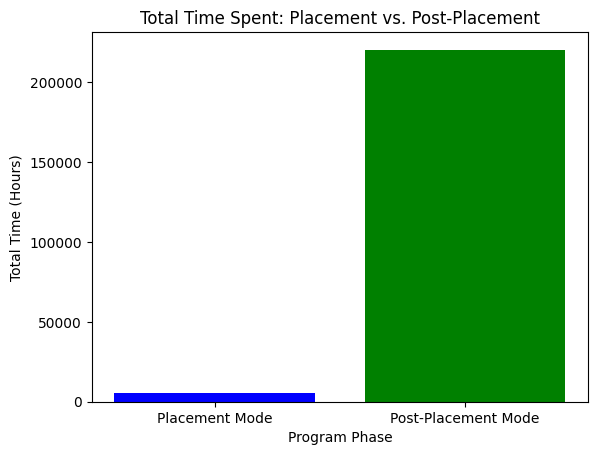

In [198]:
# Calculate totals for placement and post-placement
TOTAL_TIME_PLACEMENT_HOURS = merged['IN_APP_TIME_SPENT_PLACEMENT_MINUTES'].sum() / 60  # Convert minutes to hours
TOTAL_TIME_POST_HOURS = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].sum()

# Prepare data for the bar chart
time_data = {
    'Mode': ['Placement Mode', 'Post-Placement Mode'],
    'Total Time (Hours)': [TOTAL_TIME_PLACEMENT_HOURS, TOTAL_TIME_POST_HOURS]
}

# Create the bar chart
plt.bar(time_data['Mode'], time_data['Total Time (Hours)'], color=['blue', 'green'])
plt.title('Total Time Spent: Placement vs. Post-Placement')
plt.ylabel('Total Time (Hours)')
plt.xlabel('Program Phase')
plt.xticks(rotation=0)
plt.show()


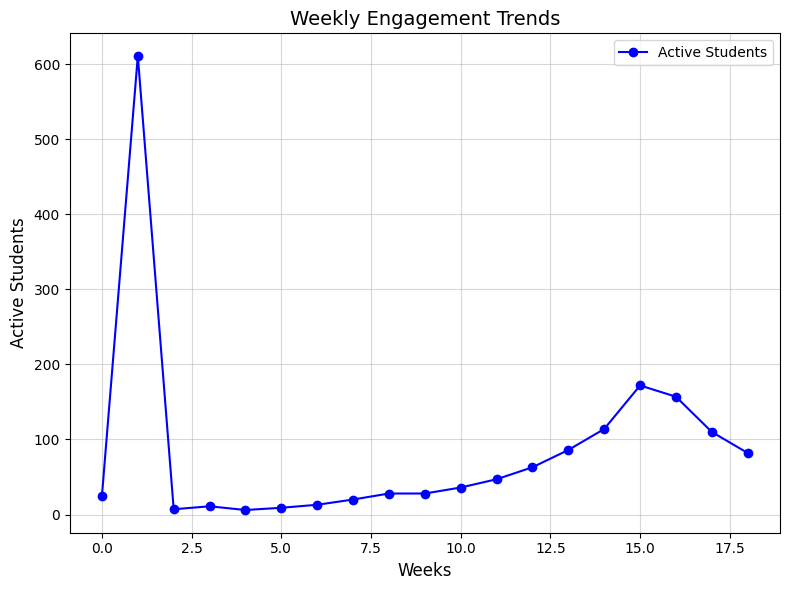

In [199]:
# 1. Line Chart: Weekly Engagement Trends
# This chart shows how the number of active students varied week by week.
# Weekly engagement trends
weeks = list(range(0, 19))  # 18 weeks of the pilot
# Create a DataFrame with one row per student per week
# Assuming `active_weeks_since_placement` contains the number of weeks the student was active
weekly_data = merged[['STUDENT_ID', 'ACTIVE_WEEKS_SINCE_PLACEMENT']]

# Expand "active_weeks_since_placement" into a per-week dataset
weekly_data = weekly_data.explode('ACTIVE_WEEKS_SINCE_PLACEMENT')

# Group by week and count unique students
active_students_per_week = weekly_data.groupby('ACTIVE_WEEKS_SINCE_PLACEMENT')['STUDENT_ID'].nunique()

# Output as a dictionary or DataFrame
active_students_per_week_dict = active_students_per_week.to_dict()

# Plot the line chart
plt.figure(figsize=(8, 6))
plt.plot(weeks, active_students_per_week, marker='o', linestyle='-', color='blue', label='Active Students')
plt.title('Weekly Engagement Trends', fontsize=14)
plt.xlabel('Weeks', fontsize=12)
plt.ylabel('Active Students', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

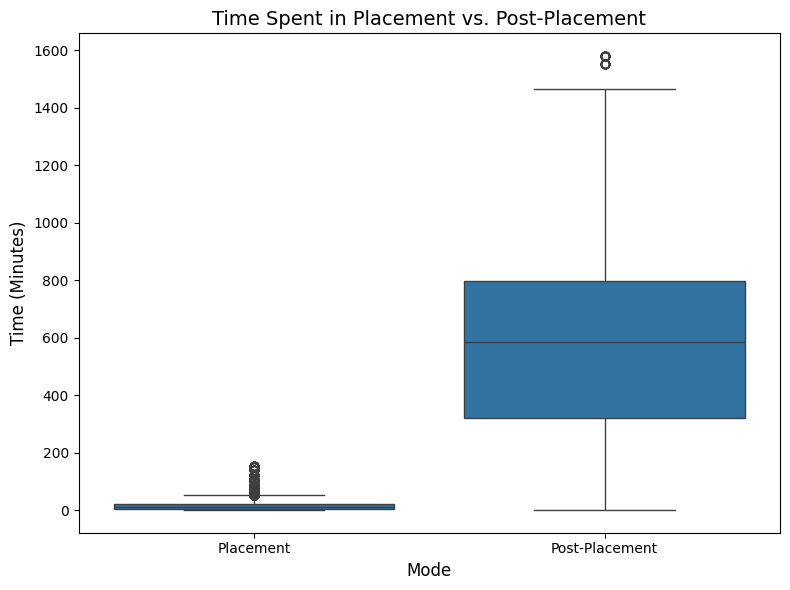

In [132]:
# Convert 'IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS' to minutes
merged['IN_APP_TIME_SPENT_POST_PLACEMENT_MINUTES'] = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'] * 60

# Reshape the data into long format
usage_boxplot_data = merged[['IN_APP_TIME_SPENT_PLACEMENT_MINUTES', 'IN_APP_TIME_SPENT_POST_PLACEMENT_MINUTES']].melt(
    var_name='Mode', value_name='Time'
)

# Map column names to user-friendly labels
usage_boxplot_data['Mode'] = usage_boxplot_data['Mode'].replace({
    'IN_APP_TIME_SPENT_PLACEMENT_MINUTES': 'Placement',
    'IN_APP_TIME_SPENT_POST_PLACEMENT_MINUTES': 'Post-Placement'
})

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=usage_boxplot_data, x='Mode', y='Time')
plt.title('Time Spent in Placement vs. Post-Placement', fontsize=14)
plt.ylabel('Time (Minutes)', fontsize=12)
plt.xlabel('Mode', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [148]:
# Calculate:
# 	1.	Total Skills Mastered (SUM_SKILLS_MASTERED summed across all students).
# 	2.	Average Percentage Skill Growth (PCT_SKILL_GROWTH averaged across all students).
# 	3.	Total Skill Growth (SUM_SKILLS_MASTERED + SUM_SKILLS_PASSED_IN_PLACEMENT as a percentage of CNT_TOTAL_NGR_SKILLS_AVAILABLE).
# 1. Total Skills Mastered
total_skills_mastered = merged['SUM_SKILLS_MASTERED'].sum()

# 2. Average Percentage Skill Growth
average_pct_skill_growth = merged['PCT_SKILL_GROWTH'].mean()

# 3. Total Skill Growth (Mastered + Passed)
merged['TOTAL_SKILL_GROWTH'] = (
    (merged['SUM_SKILLS_MASTERED'] + merged['SUM_SKILLS_PASSED_IN_PLACEMENT'])
    / merged['CNT_TOTAL_NGR_SKILLS_AVAILABLE'] * 100
)
average_total_skill_growth = merged['TOTAL_SKILL_GROWTH'].mean()

# Output Results
results = {
    "Total Skills Mastered": total_skills_mastered,
    "Average Percentage Skill Growth (%)": average_pct_skill_growth,
    "Total Skill Growth (%)": average_total_skill_growth
}

results

{'Total Skills Mastered': np.int64(796213),
 'Average Percentage Skill Growth (%)': np.float64(0.2827270561092654),
 'Total Skill Growth (%)': np.float64(488.73131955088945)}

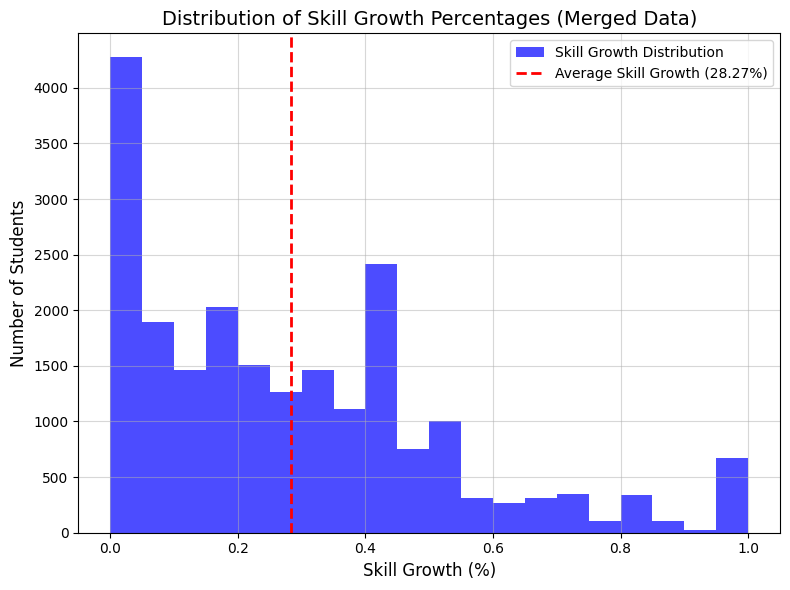

In [177]:
#1. Histogram: Distribution of Skill Growth Percentages
# Use the merged DataFrame for the histogram
mean_skill_growth = merged['PCT_SKILL_GROWTH'].mean()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(merged['PCT_SKILL_GROWTH'], bins=20, color='blue', alpha=0.7, label='Skill Growth Distribution')

# Add a vertical line for the mean
plt.axvline(mean_skill_growth, color='red', linestyle='dashed', linewidth=2, label=f'Average Skill Growth ({mean_skill_growth:.2%})')

# Add titles and labels
plt.title('Distribution of Skill Growth Percentages (Merged Data)', fontsize=14)
plt.xlabel('Skill Growth (%)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

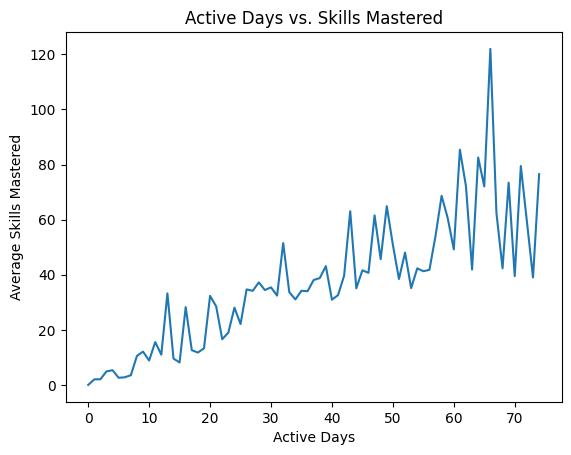

In [178]:
#Advanced Insights
#Usage Patterns
# Group students by active days
active_days_group = merged.groupby('ACTIVE_DAYS_SINCE_PLACEMENT')['SUM_SKILLS_MASTERED'].mean()
active_days_group.plot(title='Active Days vs. Skills Mastered')
plt.xlabel('Active Days')
plt.ylabel('Average Skills Mastered')
plt.show()

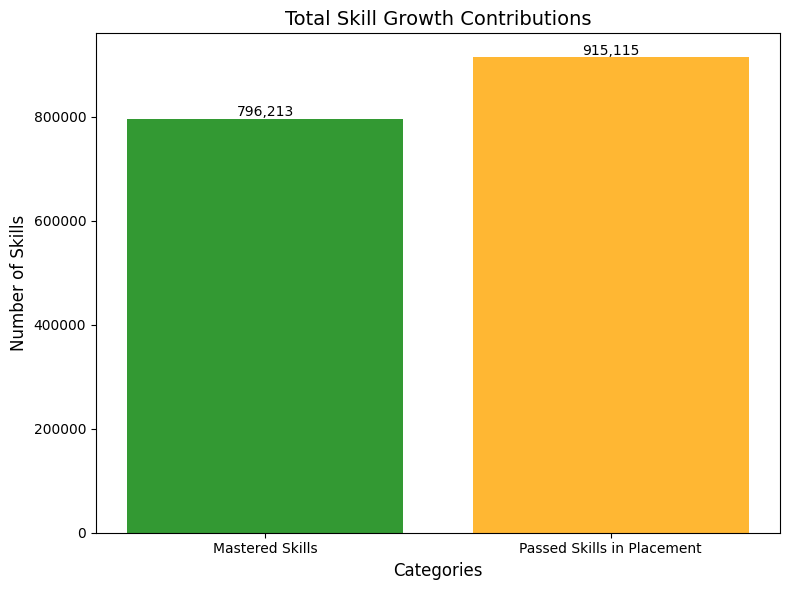

In [190]:
# Prepare data for the progress bars
categories = ['Mastered Skills', 'Passed Skills in Placement']
values = [
    merged['SUM_SKILLS_MASTERED'].sum(),
    merged['SUM_SKILLS_PASSED_IN_PLACEMENT'].sum()
]

# Plot the progress bars
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'orange'], alpha=0.8)

# Add value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 5000, f'{value:,}', ha='center', fontsize=10)  # Offset for better visibility

# Chart title and labels
plt.title('Total Skill Growth Contributions', fontsize=14)
plt.ylabel('Number of Skills', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/dj/_ws3m2zs7sj0tjz2njz0n72r0000gn/T/ipykernel_76819/1109595956.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


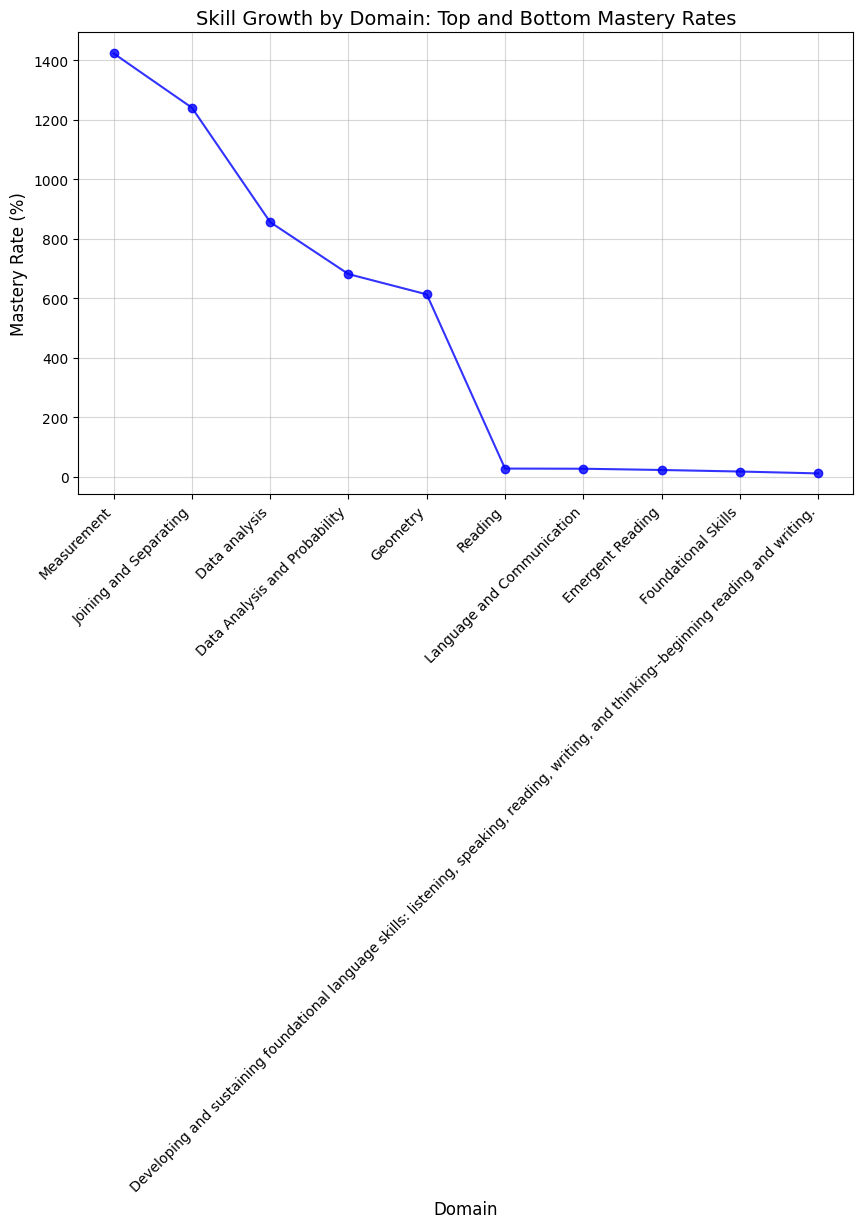

In [180]:
# Select top 5 and bottom 5 domains by mastery rate
top_bottom_domains = pd.concat([
    domain_insights.head(5),
    domain_insights.tail(5)
])

# Plot the mastery rates for the selected domains
plt.figure(figsize=(10, 6))
plt.plot(top_bottom_domains.index, top_bottom_domains['mastery_rate'], marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title('Skill Growth by Domain: Top and Bottom Mastery Rates', fontsize=14)
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Mastery Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [164]:
# Display the domains and their corresponding mastery rates for top and bottom 5 domains
top_bottom_domains_with_values = top_bottom_domains[['mastery_rate']]

# Print the values for review
print("Top and Bottom Domains with Mastery Rates:")
print(top_bottom_domains_with_values)

Top and Bottom Domains with Mastery Rates:
                                                    mastery_rate
DOMAIN                                                          
Measurement                                          1423.427673
Joining and Separating                               1240.909091
Data analysis                                         856.331169
Data Analysis and Probability                         681.666667
Geometry                                              613.500000
Reading                                                28.034343
Language and Communication                             27.524631
Emergent Reading                                       23.303152
Foundational Skills                                    18.142746
Developing and sustaining foundational language...     11.785336


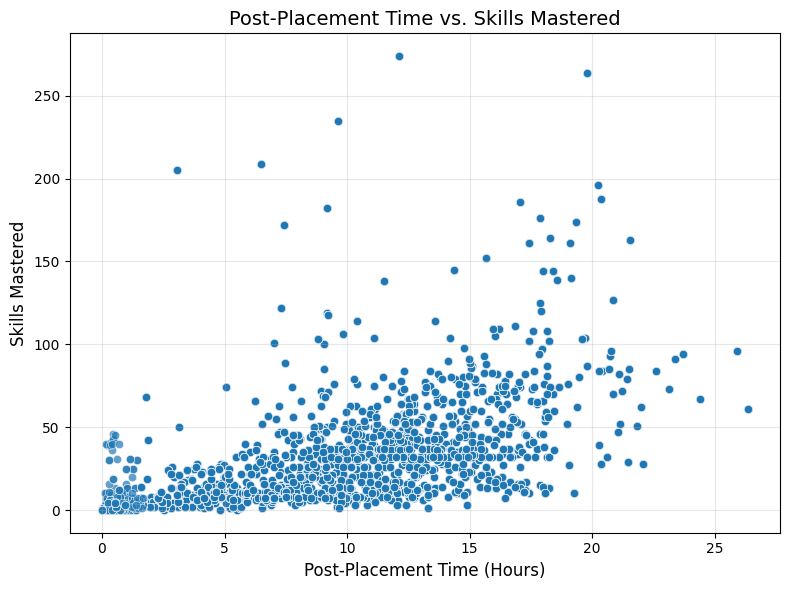

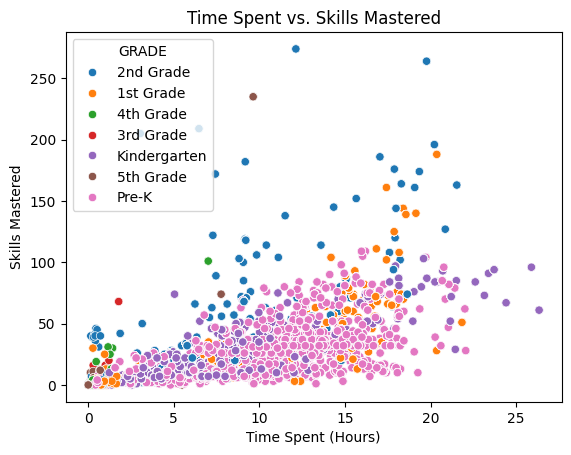

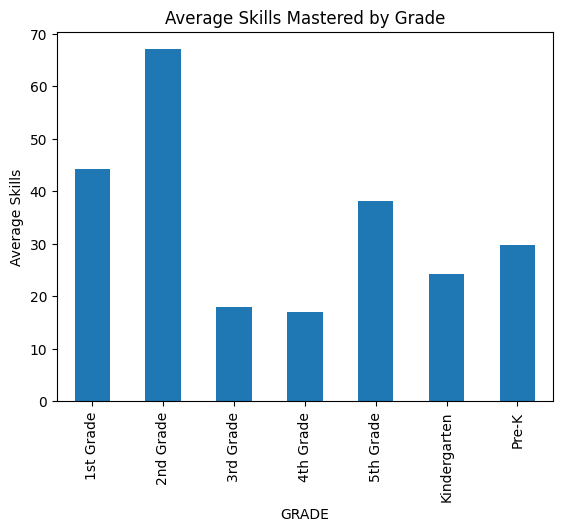

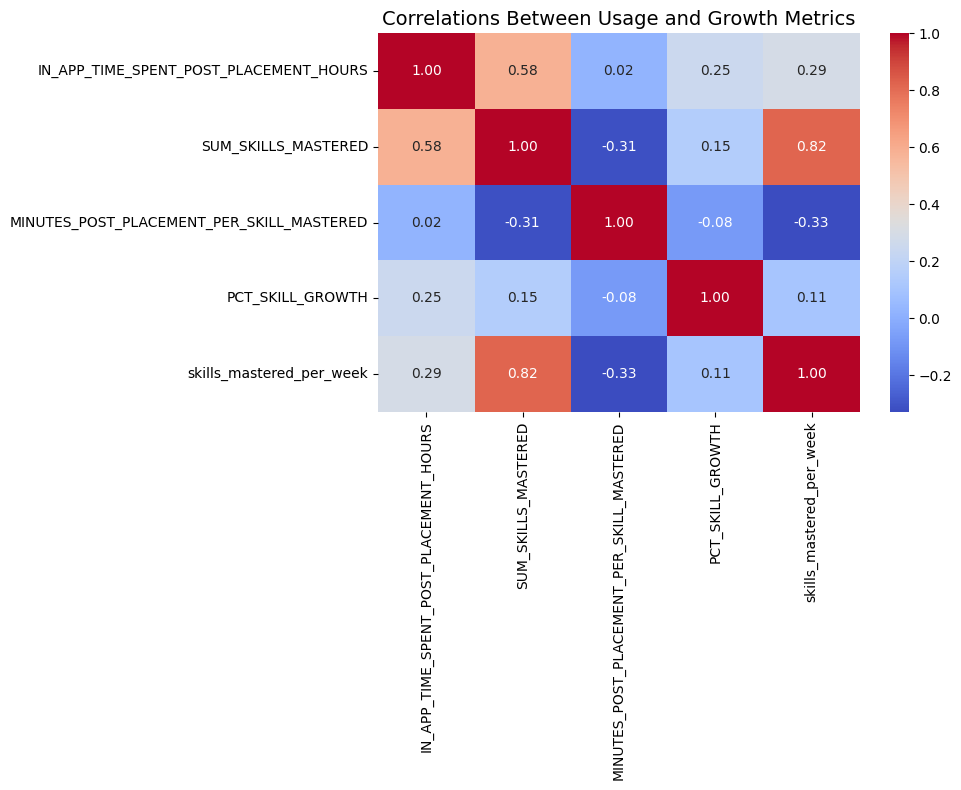

In [203]:
# Scatter Plot: Post-placement time vs. skill mastery
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged,
    x='IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS',
    y='SUM_SKILLS_MASTERED',
    alpha=0.7
)
plt.title('Post-Placement Time vs. Skills Mastered', fontsize=14)
plt.xlabel('Post-Placement Time (Hours)', fontsize=12)
plt.ylabel('Skills Mastered', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Scatter Plot: Time Spent vs. Skills Mastered
sns.scatterplot(
    x='IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS', 
    y='SUM_SKILLS_MASTERED', 
    data=merged, 
    hue='GRADE'
)
plt.title('Time Spent vs. Skills Mastered')
plt.xlabel('Time Spent (Hours)')
plt.ylabel('Skills Mastered')
plt.show()

##Bar Chart: Skills Mastered by Grade
skills_by_grade.plot(kind='bar', title='Average Skills Mastered by Grade', ylabel='Average Skills')
plt.xlabel('GRADE')
plt.show()

# Heatmap: Correlations between usage and growth metrics
# Calculate engagement efficiency
merged['skills_mastered_per_week'] = merged['SUM_SKILLS_MASTERED'] / merged['ACTIVE_WEEKS_SINCE_PLACEMENT']
correlation_columns = [
    'IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS',
    'SUM_SKILLS_MASTERED',
    'MINUTES_POST_PLACEMENT_PER_SKILL_MASTERED',
    'PCT_SKILL_GROWTH',
    'skills_mastered_per_week'
]
correlation_matrix = merged[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlations Between Usage and Growth Metrics', fontsize=14)
plt.tight_layout()
plt.show()

In [183]:
# Average skills mastered
avg_skills_mastered = merged['SUM_SKILLS_MASTERED'].mean()
print(f"Average Skills Mastered: {avg_skills_mastered}")

##Grouping and Aggreting
# Average skills mastered by grade
skills_by_grade = merged.groupby('GRADE')['SUM_SKILLS_MASTERED'].mean()
print("\nAverage Skills Mastered by Grade:")
print(skills_by_grade)

Average Skills Mastered: 34.5248894284971

Average Skills Mastered by Grade:
GRADE
1st Grade       44.230508
2nd Grade       67.051976
3rd Grade       18.026549
4th Grade       17.079646
5th Grade       38.202381
Kindergarten    24.265351
Pre-K           29.815299
Name: SUM_SKILLS_MASTERED, dtype: float64


In [39]:
# Total time spent per grade
time_by_grade = merged.groupby('GRADE')['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].sum()
print("\nTotal Time Spent by Grade:")
print(time_by_grade)


Total Time Spent by Grade:
GRADE
1st Grade       29762.471110
2nd Grade       33929.294722
3rd Grade         320.808611
4th Grade         552.112778
5th Grade         893.415278
Kindergarten    68308.925551
Pre-K           86542.615276
Name: IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS, dtype: float64


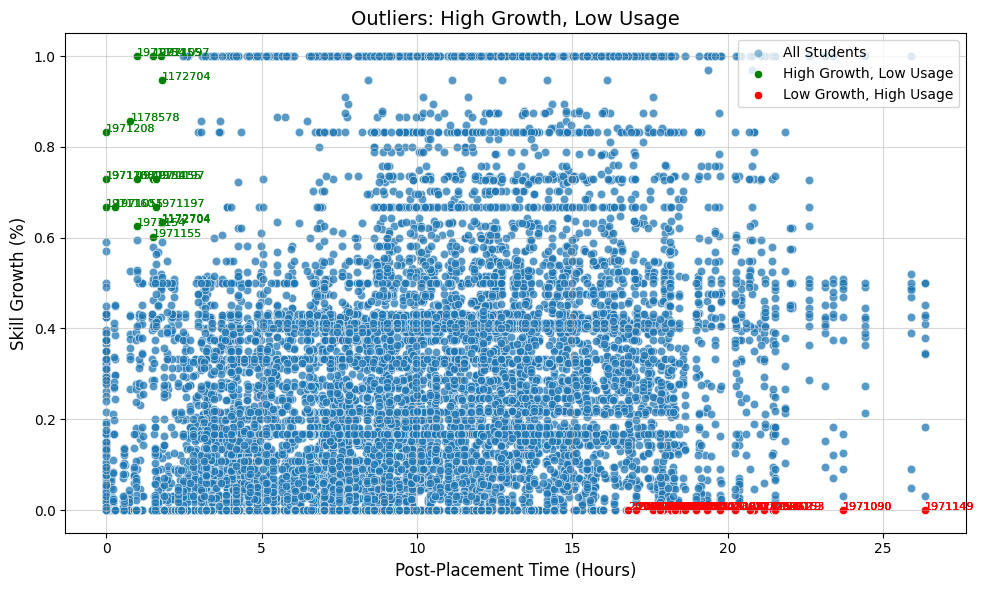

High Growth, Low Usage:
       STUDENT_ID  PCT_SKILL_GROWTH  IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS
2122      1178578          0.857143                                0.777500
2135      1178578          0.857143                                0.777500
5700      1971055          0.666667                                0.285833
5711      1971055          0.666667                                0.285833
6527      1971097          1.000000                                1.751389
6538      1971097          1.000000                                1.751389
7255      1971154          0.626506                                0.981944
7261      1971154          1.000000                                0.981944
7262      1971154          0.729730                                0.981944
7267      1971154          0.626506                                0.981944
7273      1971154          1.000000                                0.981944
7274      1971154          0.729730                             

In [184]:
# Define thresholds for outliers
high_growth_threshold = merged['PCT_SKILL_GROWTH'].quantile(0.9)  # Top 10% growth
low_time_threshold = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].quantile(0.1)  # Bottom 10% time

# Identify high growth, low usage outliers
high_growth_low_usage = merged[
    (merged['PCT_SKILL_GROWTH'] >= high_growth_threshold) &
    (merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'] <= low_time_threshold)
]

# Identify low growth, high usage outliers
low_growth_high_usage = merged[
    (merged['PCT_SKILL_GROWTH'] <= merged['PCT_SKILL_GROWTH'].quantile(0.1)) &
    (merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'] >= merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].quantile(0.9))
]

# Scatter plot with labeled outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged,
    x='IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS',
    y='PCT_SKILL_GROWTH',
    alpha=0.5,
    label='All Students'
)

# Highlight high growth, low usage outliers
sns.scatterplot(
    data=high_growth_low_usage,
    x='IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS',
    y='PCT_SKILL_GROWTH',
    color='green',
    label='High Growth, Low Usage'
)

# Highlight low growth, high usage outliers
sns.scatterplot(
    data=low_growth_high_usage,
    x='IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS',
    y='PCT_SKILL_GROWTH',
    color='red',
    label='Low Growth, High Usage'
)

# Annotate some outliers
for i, row in high_growth_low_usage.iterrows():
    plt.annotate(row['STUDENT_ID'], (row['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'], row['PCT_SKILL_GROWTH']),
                 fontsize=8, color='green')

for i, row in low_growth_high_usage.iterrows():
    plt.annotate(row['STUDENT_ID'], (row['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'], row['PCT_SKILL_GROWTH']),
                 fontsize=8, color='red')

# Titles and labels
plt.title('Outliers: High Growth, Low Usage', fontsize=14)
plt.xlabel('Post-Placement Time (Hours)', fontsize=12)
plt.ylabel('Skill Growth (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Output outlier summaries for further insights
print("High Growth, Low Usage:")
print(high_growth_low_usage[['STUDENT_ID', 'PCT_SKILL_GROWTH', 'IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS']])

print("\nLow Growth, High Usage:")
print(low_growth_high_usage[['STUDENT_ID', 'PCT_SKILL_GROWTH', 'IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS']])

In [185]:
##Skill Growth Percentages
# Calculate total skill growth percentage
merged['TOTAL_SKILL_GROWTH'] = (merged['SUM_NGR_SKILLS_MASTERED'] / merged['CNT_TOTAL_NGR_SKILLS_AVAILABLE']) * 100

In [51]:
##Deper Analytics
# Overall usage metrics
total_students = merged['STUDENT_ID'].nunique()
total_time_placement = merged['IN_APP_TIME_SPENT_PLACEMENT_MINUTES'].sum()
total_time_post = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].sum()

In [52]:
# Average usage per student
avg_time_placement = merged['IN_APP_TIME_SPENT_PLACEMENT_MINUTES'].mean()
avg_time_post = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].mean()

In [53]:
# Engagement trends
avg_active_days_post = merged['ACTIVE_DAYS_SINCE_PLACEMENT'].mean()
avg_active_weeks_post = merged['ACTIVE_WEEKS_SINCE_PLACEMENT'].mean()

In [54]:
# Skill growth
merged['TOTAL_SKILL_GROWTH'] = (merged['SUM_NGR_SKILLS_MASTERED'] / merged['CNT_TOTAL_NGR_SKILLS_AVAILABLE']) * 100
avg_skill_growth = merged['TOTAL_SKILL_GROWTH'].mean()

In [55]:
# Efficiency
merged['EFFICIENCY'] = merged['MINUTES_POST_PLACEMENT_PER_SKILL_MASTERED']
avg_efficiency = merged['EFFICIENCY'].mean()

In [68]:
# Median usage (to account for outliers)
median_time_placement = merged['IN_APP_TIME_SPENT_PLACEMENT_MINUTES'].median()
median_time_post = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].median()

# Engagement consistency
std_active_days_post = merged['ACTIVE_DAYS_SINCE_PLACEMENT'].std()
std_active_weeks_post = merged['ACTIVE_WEEKS_SINCE_PLACEMENT'].std()

# Average time per active day
merged['AVG_TIME_PER_ACTIVE_DAY'] = merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'] / merged['ACTIVE_DAYS_SINCE_PLACEMENT']
avg_time_per_active_day = merged['AVG_TIME_PER_ACTIVE_DAY'].mean()

In [69]:
# 2. Skill Growth Metrics

# Additional Metrics
# 	•	Baseline vs. Growth:
# 	•	Compare sum_skills_passed_in_placement to sum_skills_mastered to show how much learning occurred relative to prior knowledge.
# 	•	Domain-Level Mastery Rates:
# 	•	Calculate mastery rates for each domain: sum_ngr_skills_mastered / cnt_total_ngr_skills_available.
# 	•	Growth Segmentation:
# 	•	Group students into growth categories (e.g., low growth: <25%, moderate: 25-50%, high: >50%).
# Baseline vs. Growth
merged['SKILLS_GAINED'] = merged['SUM_SKILLS_MASTERED'] - merged['SUM_SKILLS_PASSED_IN_PLACEMENT']
avg_skills_gained = merged['SKILLS_GAINED'].mean()

# Domain-Level Mastery Rates
merged['DOMAIN_MASTERY_RATE'] = merged['SUM_NGR_SKILLS_MASTERED'] / merged['CNT_TOTAL_NGR_SKILLS_AVAILABLE']
domain_mastery_rates = merged.groupby('DOMAIN')['DOMAIN_MASTERY_RATE'].mean()

# Growth Segmentation
merged['GROWTH_CATEGORY'] = pd.cut(
    merged['TOTAL_SKILL_GROWTH'],
    bins=[0, 25, 50, 75, 100],
    labels=['Low (<25%)', 'Moderate (25-50%)', 'High (50-75%)', 'Very High (75-100%)']
)
growth_segment_counts = merged['GROWTH_CATEGORY'].value_counts()


In [130]:
# Efficiency of skill mastery
merged['ENGAGEMENT_EFFICIENCY'] = merged['SUM_SKILLS_MASTERED'] / merged['ACTIVE_WEEKS_SINCE_PLACEMENT']
avg_efficiency = merged['ENGAGEMENT_EFFICIENCY'].mean()

# Correlation focus
# Select only numeric columns for correlation
numeric_data = numeric_data.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_with_growth = numeric_data.corr()['TOTAL_SKILL_GROWTH'].sort_values(ascending=False)

# Outliers (e.g., high growth, low usage)
high_growth_low_usage = merged[(merged['TOTAL_SKILL_GROWTH'] > 75) & (merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'] < merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].median())]
low_growth_high_usage = merged[(merged['TOTAL_SKILL_GROWTH'] < 25) & (merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'] > merged['IN_APP_TIME_SPENT_POST_PLACEMENT_HOURS'].median())]

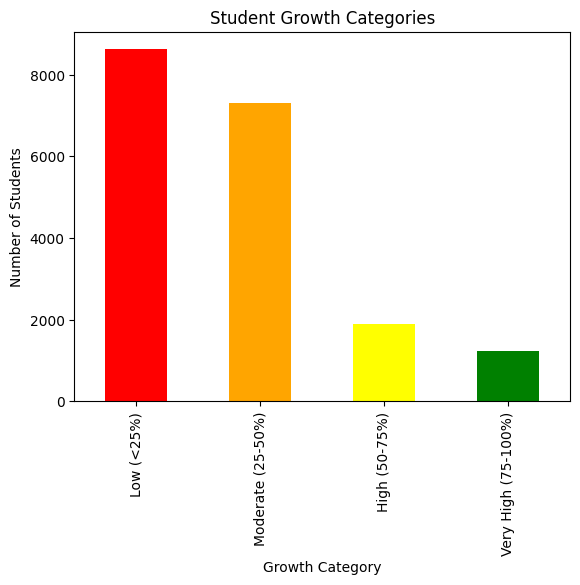

In [73]:
# Stacked Bar Chart: Growth Segmentation
# 	•	Highlights proportions of students in growth categories.
growth_segment_counts.plot(kind='bar', stacked=True, color=['red', 'orange', 'yellow', 'green'])
plt.title('Student Growth Categories')
plt.xlabel('Growth Category')
plt.ylabel('Number of Students')
plt.show()

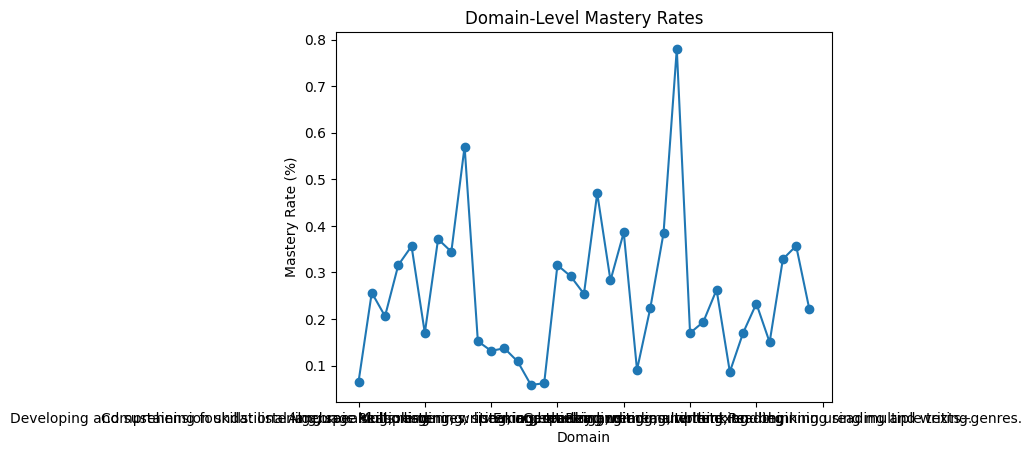

In [74]:
# Line Plot: Domain-Level Mastery Rates
# 	•	Tracks mastery rates by domain.
domain_mastery_rates.plot(kind='line', marker='o')
plt.title('Domain-Level Mastery Rates')
plt.xlabel('Domain')
plt.ylabel('Mastery Rate (%)')
plt.show()

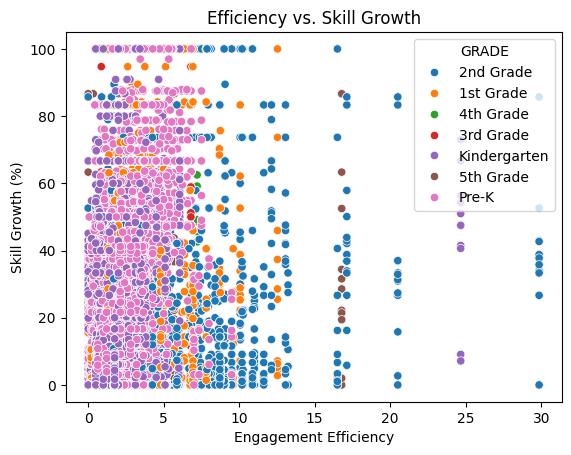

In [76]:
# 3. Usage Patterns

# Scatter Plot: Efficiency vs. Skill Growth
# 	•	Correlation between efficiency and growth.
sns.scatterplot(x='ENGAGEMENT_EFFICIENCY', y='TOTAL_SKILL_GROWTH', hue='GRADE', data=merged)
plt.title('Efficiency vs. Skill Growth')
plt.xlabel('Engagement Efficiency')
plt.ylabel('Skill Growth (%)')
plt.show()

In [202]:
merged.to_csv('merged_data.csv', index=False)